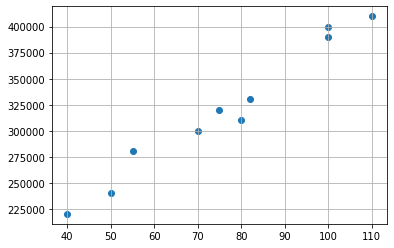

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

H = np.array([[100],
  [110],
  [50],
  [70],
  [80],
  [40],
  [100],
  [55],
  [75],
  [82]             
])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])

plt.scatter(H[:, 0], P)
plt.grid()

# Regressão Linear
Como você já deve saber, podemos definir uma função para representar nosso **modelo** de dados:

\begin{equation}
  y = b + w x
\end{equation}

In [3]:
w = 2000
b = 200000

def predict(w, b, x):
  return b + (w * x)

Podemos ter diversas combinações de valores *w* e *b*. A pergunta é: qual usar?

Vamos pensar um pouco:
- Para cada par (w, b) que escolhamos, geraremos um novo modelo $y$.
- Para cada modelo gerado, ele vai estimar valores diferentes para um dado $x_i$.
- Essa estimativa terá um **erro** em relação ao valor correto $(y - ŷ)$.
- Se eu somar todos os erros de cada $x_i$ de uma combinação (w, b), nós teremos o erro do modelo (w, b) (**E(w, b)**).
- Logo, basta achar uma combinação (w, b) que tenha o menor erro possível!

### Tá, mas como que faz isso?
Isso, jovem, é um problema de **otimização**. A solução varia de acordo com o cálculo que você usa para calcular o erro. Uma métrica de erro muito comum utilizada éo *Erro quadrático*, o qual subtrai $y - ŷ$ e eleva o valor ao quadrado.

Há um dito popular que diz *"É errando que se aprende"*. Bom, se é assim, então vamos deixar o computador ficar errando os valores e aprender com isso! Como foi dito, isso é um problema de otimização. Para resolvê-lo, utilizamos a técnica do **gradiente descendente**, a qual, após uma série de *abracadabras matemáticos*, chega na seguinte fórmula:

\begin{equation}
  w_{k + 1} = w_k - \alpha(\frac{2}{N} \sum_{i = 1}^{N} (- x_i (y - ŷ)))
\end{equation}

\begin{equation}
  b_{k + 1} = b_k - \alpha(\frac{2}{N} \sum_{i = 1}^{N} -(y - ŷ))
\end{equation}

A primeira fórmula diz o seguinte: para eu aprender um novo valow $w_{k + 1}$, vou atualizar o valor $w_k$ que eu tenho a partir de um gradiente (somatório entre parênteses) utilizando um fator de aprendizagem $\alpha$. Esse gradiente vêm do cálculo da função do erro quadrático. O mesmo vale para a segunda fórmula.

SInta-se convidado a buscar na internet a demonstração da fórmula. É um conhecimento bem interessante para caso um dia você tenha que implementar seu próprio gradiente.

# Menos papo, mais código!

In [4]:
def gradient_descendent(train_X, train_Y, alpha, w = 0, b = 0):
  sum_error = 0
  elem_times_error = 0
  n = len(train_X)

  for x, y in zip(train_X, train_Y):
    yhat = predict(w, b, x)
    error = y - yhat
    sum_error += error
    elem_times_error += x * error

  b += (2 * (alpha * sum_error) / n)
  w += (2 * (alpha * elem_times_error) / n)
  return (w, b)

Vamos iniciar nossos valores de $w$ e $b$ como 0 e ver o que temos

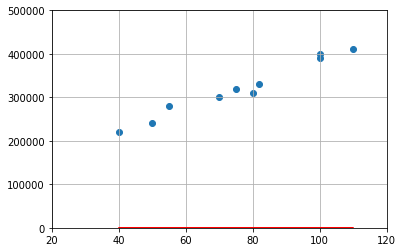

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

w = 0
b = 0
plt.scatter(H[:, 0], P)
plt.plot(np.array(H[:, 0]), [predict(w, b, x) for x in H[:, 0]], c = 'r')
plt.xlim((20, 120))
plt.ylim((0, 500000))
plt.grid()

Ok, nosso modelo só estima 0 para todo mundo. Vamos aplicar o cálculo do gradiente descendente uma vez, com um passo de aprendizagem bem pequeno, e ver como que fica

w: 4084.467122014723	b:57.83363231550416


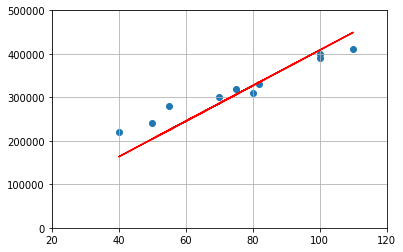

In [6]:
for _ in range(50):
  w, b = gradient_descendent(H[:, 0], P, 0.00001, w, b)

print("w: {}\tb:{}".format(w, b))
plt.scatter(H[:, 0], P)
plt.plot(np.array(H[:, 0]), [predict(w, b, x) for x in H[:, 0]], c='r')
plt.xlim((20, 120))
plt.ylim((0, 500000))
plt.grid()

Já deu uma melhorada, não foi? Continue rodando a célula acima e veja se o modelo aprende!

**OBS:** se os valored de *w* e *b* começarem a variar muito pouco, ou sejá, o modelo não consegue ficar melhor, dizemos que ele **convergiu**.

# Parabéns! Você implementou seu primeiro modelo linear!

Mas não se preocupe, provavelmente você não vai precisar implementar de novo.

O Scikit Learn que traz consigo diversos modelos, métodos e funções auxiliares já implementadas.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Olha como é fácil criar um modelo de Regressão Linear:

In [8]:
model = LinearRegression()

Olha como é ainda mais fácil treinar esse modelo!

In [9]:
model.fit(H, P)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vamos ver como que fica?

Mean Error: 10539.347432900066


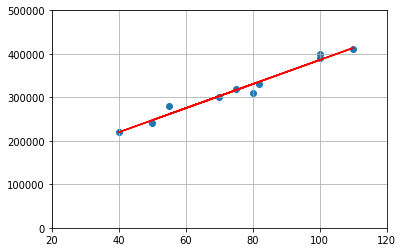

In [10]:
y_predicted = model.predict(H)
plt.scatter(H[:, 0], P)
plt.plot(np.array(H[:, 0]), y_predicted, c='r')
plt.xlim((20, 120))
plt.ylim((0, 500000))
plt.grid()

error = np.sqrt(mean_squared_error(P, y_predicted))
print("Mean Error: {}".format(error))

Legal, não é?